In [23]:
import plotly.express as px
import pandas as pd

bestcountries = pd.read_csv(r'C:\Users\brenda\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Best_Countries_for_Startups.csv')



#bringing in best cities for startups data, to merge to the best countries data
bestcities = pd.read_csv(r'C:\Users\brenda\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Best_Cities_for_Startups.csv')

#counting the amount of best cities, by country
bestcities = bestcities['country'].value_counts() 
bestcities = pd.DataFrame (data = bestcities)
bestcities = bestcities.reset_index()
bestcities.rename({'index': 'country', 'country': 'citycount'}, axis=1, inplace=True)

#had to do a little bit of dtype and regex cleaning in order to get the merge to work
bestcountries['country'] = bestcountries['country'].astype(str)
bestcities['country'] = bestcities['country'].astype(str)
bestcountries ['country'].replace(r"^ +| +$", r"", regex=True, inplace=True)
bestcities['country'].replace(r"^ +| +$", r"", regex=True, inplace=True)


bestcountries = pd.merge(bestcountries, bestcities, how="left", on=["country"])
#print (bestcountries.head (n = 10))


#mapping the merged dataframes on a world map in order to visually demonstrate top countries by total score and count of best cities
fig = px.choropleth(bestcountries, locations= "country", locationmode='country names',
                    color="total score", 
                    hover_name=bestcountries["citycount"], title = "Heat Map of Countries using 'Best Startup Countries' Total Scores and 'Best Startup City' Count",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


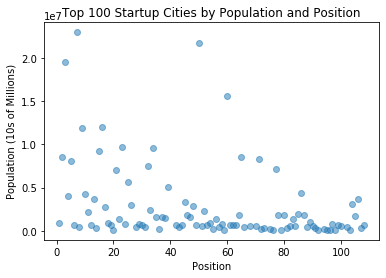

In [20]:
from matplotlib import pyplot



bestcities = pd.read_csv(r'C:\Users\brenda\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Best_Cities_for_Startups.csv')
citypop = pd.read_csv(r'C:\Users\brenda\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\City_Populations.csv')

#Need to clean up city names on both of these data sets in order to merge
#Because there is no unique identifier in the city populations data set, decided to create a unique identifier to use for merging - this unique identifier is a combination of city and country
#This becomes an actual unique identifier later, when I order the dataset and eliminate duplicates
citypop["City"] = citypop["City"]. str. lower()
citypop['City'] = citypop['City'].str.replace(r"'", '')

citypop [['popcities', 'city2']] = citypop["City"].str.split("(", n = 1, expand=True)
citypop ['popcities'].replace(r"^ +| +$", r"", regex=True, inplace=True)


citypop [['Country1', 'Country2', 'Country']] = citypop['Country or Area'].str.split(" ", n = 2, expand=True)
citypop ['countryfinal'] = citypop["Country1"].fillna('') + " " + citypop ['Country2'].fillna('')


citypop ['popcitycountry'] = citypop["popcities"].fillna('') +" " + citypop ['countryfinal']
citypop ["popcitycountry"] = citypop["popcitycountry"]. str. lower()
citypop ['popcitycountry'].replace(r"^ +| +$", r"", regex=True, inplace=True)


bestcities [['cities', 'pt2', 'pt3']] = bestcities["city"].str.split(' ', n = 2, expand=True)
bestcities ['country'].replace(r"^ +| +$", r"", regex=True, inplace=True)

bestcities ['cityfinal'] = bestcities["cities"].fillna('')+ " " +bestcities["pt2"].fillna('')
bestcities ['cityfinal'].replace(r"^ +| +$", r"", regex=True, inplace=True)

bestcities ['citycountry'] = bestcities["cityfinal"].fillna('')+ " " + bestcities ['country']

bestcities["citycountry"] = bestcities["citycountry"]. str. lower()

#sorting the city population data set by year and eliminating duplicates
citypop.sort_values(by=['Year'], ascending = False)
citypop = citypop.drop_duplicates(subset=['popcitycountry'])

#some more cleaning prior to merge
bestcities ['citycountry'].replace(r"^ +| +$", r"", regex=True, inplace=True)

#this merge returns 544 matches, these are very difficult to clean up. Here is an example of something that I just can't clean up using Python (although there may be a library for this): Mbabane is a city in Eswatini (previously called Swaziland)
citywithpop = pd.merge(bestcities, citypop, how = 'left', left_on = 'citycountry', right_on = 'popcitycountry')

#had to somewhat manually clean this data set due to aforementioned issues with merging/cleaning data [for my purposes, I only needed the top 100 or so cities]
#dropping items where there is no match, then dropping all but the top 100 cities:
#(I only manually cleaned 20-30% of the top 100 city/country fields)
citywithpop = citywithpop.dropna (subset =['Value'])

citywithpop.sort_values(by=['position'], ascending = True)

citywithpop = citywithpop.head (n = 100)

#Want to build a visual representation to demonstrate any possible correlation between population and top cities position and to identify outliers
pyplot.scatter(citywithpop['position'], citywithpop['Value'], alpha=0.5)
pyplot.title ("Top 100 Startup Cities by Population and Position")
pyplot.xlabel ("Position")
pyplot.ylabel ("Population (10s of Millions)")
pyplot.show()

In [ ]:
print(citypop['popcities'].loc[[21813]])
